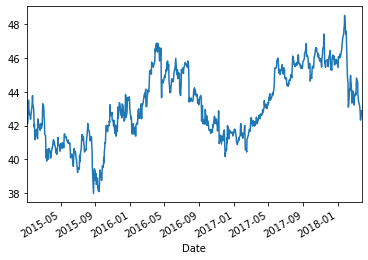

In [47]:
import quandl
 
# Get the data for Coca-cola
data = quandl.get("WIKI/KO", start_date="2015-01-01", api_key="xR8TA-S5RWRb6Stz4ePV")
 
# Plot the prices
import matplotlib.pyplot as plt
data.Close.plot()
plt.show()

In [48]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,42.26,42.40,41.80,42.14,9921011.0,0.0,1.0,38.637127,38.765125,38.216562,38.527414,9921011.0
2015-01-05,42.69,42.97,42.08,42.14,26292592.0,0.0,1.0,39.030264,39.286260,38.472558,38.527414,26292592.0
2015-01-06,42.41,42.94,42.24,42.46,16897487.0,0.0,1.0,38.774268,39.258832,38.618841,38.819981,16897487.0
2015-01-07,42.80,43.11,42.58,42.99,13411970.0,0.0,1.0,39.130834,39.414258,38.929694,39.304545,13411970.0
2015-01-08,43.18,43.57,43.10,43.51,21743628.0,0.0,1.0,39.478257,39.834823,39.405115,39.779967,21743628.0


In [49]:
df=data[["Open","High","Low","Close","Volume"]]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,42.26,42.40,41.80,42.14,9921011.0
2015-01-05,42.69,42.97,42.08,42.14,26292592.0
2015-01-06,42.41,42.94,42.24,42.46,16897487.0
2015-01-07,42.80,43.11,42.58,42.99,13411970.0
2015-01-08,43.18,43.57,43.10,43.51,21743628.0


In [50]:
df.shape

(813, 5)

In [51]:
train = df[:700]
valid = df[700:]

In [52]:
valid.shape

(113, 5)

In [53]:
preds = []
for i in range(0,113):
    a = train['Close'][len(train)-113+i:].sum() + sum(preds)
    b = a/113
    preds.append(b)

In [54]:
#calculate rmse
import numpy as np
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

1.3457437582631693

/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


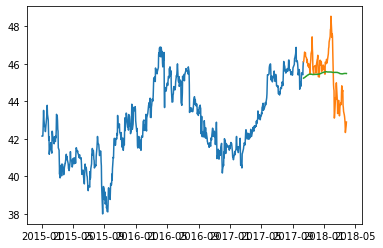

In [55]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

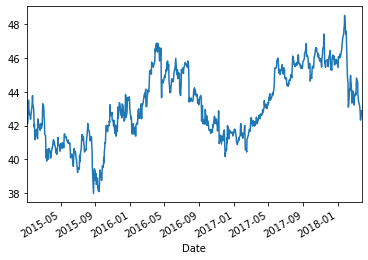

In [56]:
import quandl
 
# Get the data for Coca-cola
df = quandl.get("WIKI/KO", start_date="2015-01-01", api_key="xR8TA-S5RWRb6Stz4ePV")
 
# Plot the prices
import matplotlib.pyplot as plt
df.Close.plot()
plt.show()

In [57]:
#sorting
data = df.sort_index(ascending=True, axis=0)
data["Date"]=df.index
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [58]:
new_data.head()

,Date,Close
0,2015-01-02 00:00:00,42.14
1,2015-01-05 00:00:00,42.14
2,2015-01-06 00:00:00,42.46
3,2015-01-07 00:00:00,42.99
4,2015-01-08 00:00:00,43.51


In [59]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:700,:]
valid = dataset[700:,:]

In [61]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [62]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

W0817 12:53:00.838085 140324493227840 deprecation_wrapper.py:119] From /home/luis/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 12:53:00.854069 140324493227840 deprecation_wrapper.py:119] From /home/luis/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 12:53:00.856830 140324493227840 deprecation_wrapper.py:119] From /home/luis/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 12:53:01.280909 140324493227840 deprecation_wrapper.py:119] From /home/luis/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0817 12:53:01.450848 140324

Epoch 1/1
 - 31s - loss: 0.0095


In [63]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [64]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [65]:

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [66]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.9084515549978863

/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


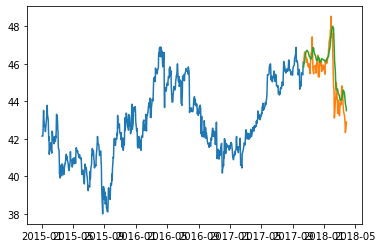

In [68]:
#for plotting
train = new_data[:700]
valid = new_data[700:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [69]:
valid.head()

,Close,Predictions
Date,,
2017-10-12,46.11,45.827469
2017-10-13,46.18,45.951366
2017-10-16,46.62,46.075127
2017-10-17,46.52,46.231770
2017-10-18,46.4,46.377003


In [1]:
import pandas as pd
import quandl
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

In [2]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.35,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.71,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.70,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.45,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.96,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0


In [3]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2016-01-04,101.783763,52.181598,741.84
2016-01-05,99.233131,52.419653,742.58
2016-01-06,97.291172,51.467434,743.62
2016-01-07,93.185040,49.677262,726.39
2016-01-08,93.677776,49.829617,714.47


In [7]:
num=int(input("Introduce the number of stocks you want to analyze:"))

Introduce the number of stocks you want to analyze:2


In [8]:
names_companies=[]
ticker_list=[]
for i in range(num):
    name=input("Introduce the name of company {0}".format(i+1))
    ticker=input("Introduce the ticker of {0}".format(name))
    names_companies.append(name)
    ticker_list.append(ticker)

Introduce the name of company 1apple
Introduce the ticker of appleAAPL
Introduce the name of company 2google
Introduce the ticker of googleGOOG


In [9]:
first_stock = quandl.get("WIKI/" + ticker_list[0], start_date=start, end_date=end)
df=pd.DataFrame({ticker_list[0]:first_stock})
for i in range(1,len(ticker_list-1)):
    stock_price = quandl.get("WIKI/" + ticker_list[i], start_date=start, end_date=end)
    stock=pd.DataFrame({ticker_list[i]: stock["Adj.Close"]})
    df.append(stock)

ValueError: If using all scalar values, you must pass an index